In [6]:
import pandas as pd
import numpy as np

data = pd.read_csv('telco_churn.csv')

data.head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,No


In [7]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
Churn               0
dtype: int64

In [28]:
data.drop_duplicates(inplace=True)

#data = data.drop('customerID', axis = 1)

data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


In [30]:
from sklearn.preprocessing import OneHotEncoder

Columns = ['gender','Partner', 'Dependents','PhoneService','MultipleLines','InternetService', 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod', 'Churn']

one_hot_encoded_data = pd.get_dummies(data, columns = ['gender','Partner', 'Dependents','PhoneService','MultipleLines','InternetService', 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod', 'Churn'])
#print(one_hot_encoded_data)

for col in one_hot_encoded_data:
    if col in Columns:
        delone_hot_encoded_data[col] 
one_hot_encoded_data.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,29.85,1,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
1,0,34,56.95,0,1,1,0,1,0,0,...,1,0,1,0,0,0,0,1,1,0
2,0,2,53.85,0,1,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
3,0,45,42.30,0,1,1,0,1,0,1,...,1,0,1,0,1,0,0,0,1,0
4,0,2,70.70,1,0,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1


In [69]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(one_hot_encoded_data)
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
print(pca_df.head())

         PC1        PC2
0 -45.014668 -13.719035
1  -6.536315   4.735797
2 -22.874078 -22.971757
3 -15.136898  20.909404
4  -7.605380 -30.134455


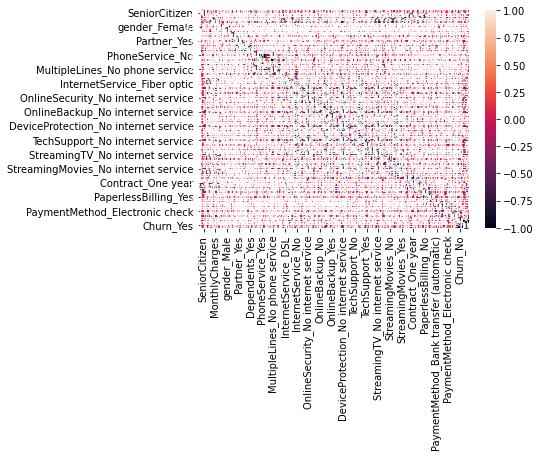

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

corr = one_hot_encoded_data.corr()

sns.heatmap(corr, annot=True)
plt.show()


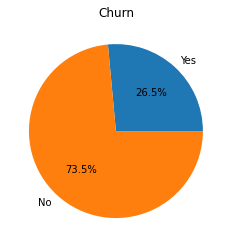

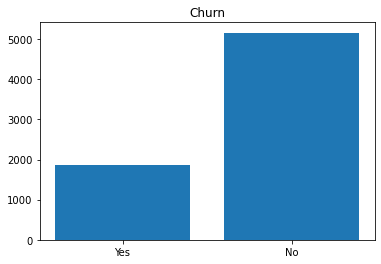

In [66]:
import matplotlib.pyplot as plt

df= {'Churn': ['Yes', 'No'], 'Quantity':[one_hot_encoded_data['Churn_Yes'].sum(),one_hot_encoded_data['Churn_No'].sum()]}

plt.pie(df['Quantity'], labels=df['Churn'], autopct='%1.1f%%')
plt.title('Churn')
plt.show()

plt.bar(df['Churn'],df['Quantity'])
plt.title('Churn')
plt.show()